In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import numpy as np
import tensorflow 
from tensorflow.keras.layers import Dense, Flatten, MaxPooling1D, UpSampling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import binary_accuracy, AUC
from sklearn.utils import shuffle
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Bidirectional, Dropout, Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_model():
    # here layers is a list with 4 elements
    
    model = Sequential()
    
    model.add(Bidirectional(LSTM(256, 
        return_sequences = True)))
    model.add(Dropout(0.2))
    
    # model.add(Bidirectional(LSTM(256, 
    #     return_sequences = True)))
    # model.add(Dropout(0.2))
    
    model.add(Bidirectional(LSTM(16,
        return_sequences = True)))
    model.add(Dropout(0.2))
    
    model.add(Bidirectional(LSTM(1,
        return_sequences = True)))
    model.add(Dropout(0.2))
    
    model.add(Bidirectional(LSTM(16,
        return_sequences = True)))
    model.add(Dropout(0.2))
    
#     model.add(Bidirectional(LSTM(256,
#         return_sequences = True)))
#     model.add(Dropout(0.2))
    
    model.add(Bidirectional(LSTM(256, 
        return_sequences = False)))
    model.add(Dropout(0.2))
    

    
    model.add(Dense(512))
    model.add(Activation("linear"))
    
    model.compile(loss="mse", optimizer=Adam(learning_rate=0.001,epsilon=1e-07))
    
    # try changing whether there is dropout, activation function, loss function, number of layers, in/out of layers
    
    return model

In [ ]:
model = build_model()
# model.summary()
model.load_weights("/content/gdrive/MyDrive/DAE_GWS_2.ckpt")


In [ ]:
pure_predict_data = np.load('/content/gdrive/MyDrive/Anagh_AE_Data_Share/pure_predict_DATA.npy')
noisy_predict_data = np.load('/content/gdrive/MyDrive/Anagh_AE_Data_Share/noisy_predict_DATA.npy')

In [ ]:
samples = 500
X = noisy_predict_data
print(X.shape)

Y=pure_predict_data

print(Y.shape)
# X = X[:samples]
# Y = Y[:samples]
# print(X.shape)
# print(Y.shape)
X=X.reshape((samples,512,1))
Y=Y.reshape((samples,512,1))
# print(X.shape)
# print(Y.shape)
# X, Y = shuffle(X, Y, random_state=103)

(500, 512)
(500, 512)


In [ ]:
score = model.evaluate(X, Y, verbose = 1) 



16/16 [==============================] - 27s 2s/step - loss: 0.0014


In [ ]:
print(score)

0.0013844501227140427


In [ ]:
score = model.evaluate(X, Y, verbose = 1) 



16/16 [==============================] - 44s 2s/step - loss: 0.0013


In [ ]:
print(score)

0.0012956015998497605


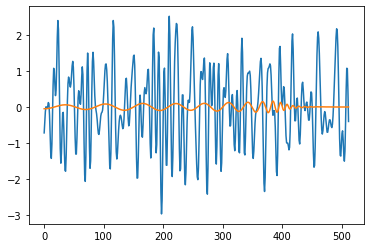

In [ ]:
p = X[221]
q = Y[221]
# print(p)
# print(q)

import matplotlib.pyplot as plt

plt.plot(range(0, len(p)), p)

# plt.figure()
plt.plot(range(0, len(p)), q)

In [ ]:
p = p.reshape((1, 512, 1))
s = model.predict(p)

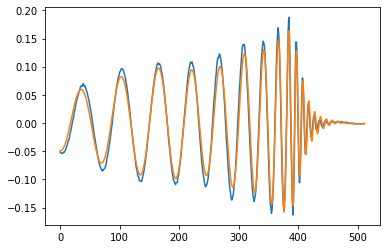

In [ ]:
import matplotlib.pyplot as plt
s = s.reshape((512,1))
plt.plot(s)
plt.plot(q)

In [ ]:
def MSEloss(X, Y):
  MSE = 0
  for i in range(0, len(X)):
    MSE+= (X[i]- Y[i])**2
  MSE= MSE/len(X)
  return abs(MSE)

p = X[433]
q = Y[433]
p = p.reshape((1,512,1))
s = model.predict(p)
print(p.shape)
print(s.shape)

p = p.reshape((512, 1))
s =s. reshape((512,1))
q = q.reshape((512,1))
print(p.shape)
print(s.shape)

MSEloss(s, q)

(1, 512, 1)
(1, 512)
(512, 1)
(512, 1)


array([0.00193497])

In [ ]:
MSE = []
for i in range(0, 500):
  p = X[i]
  q = Y[i]
  p = p.reshape((1,512,1))
  s = model.predict(p)
  p = p.reshape((512,1))
  s = s.reshape((512,1))
  q = q.reshape((512,1))
  MSE.append(MSEloss(s, q))

In [ ]:
print(np.mean(MSE))
print(np.max(MSE))
print(np.min(MSE))
print(np.std(MSE))

0.0013844501014295993
0.008693633002988126
6.488819000318023e-05
0.0016861686635039018


In [ ]:
import sys
!{sys.executable} -m pip -q install pycbc ligo-common --no-cache-dir

     |████████████████████████████████| 6.7 MB 28.2 MB/s 
     |████████████████████████████████| 324 kB 78.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 7.3 MB 35.3 MB/s 
     |████████████████████████████████| 46.2 MB 1.4 MB/s 
     |████████████████████████████████| 75 kB 42.4 MB/s 
     |████████████████████████████████| 201 kB 58.6 MB/s 
     |████████████████████████████████| 51 kB 45.6 MB/s 
     |████████████████████████████████| 1.4 MB 73.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 295 kB 53.8 MB/s 
     |████████████████████████████████| 55 kB 47.9 MB/s 
     |████████████████████████████████| 87 kB 64.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metada

In [ ]:
import numpy as np
import math
import pylab
import matplotlib.pyplot as plt
import random
import pycbc

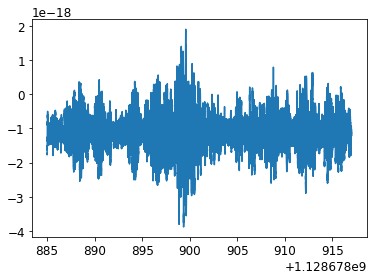

In [ ]:
%matplotlib inline

import pylab
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass, lowpass
import matplotlib.pyplot as plt

# As an example we use the GW150914 data
merger = Merger("GW151012")

# Get the data from the Livingston detector
strain = merger.strain('L1')
# print(strain.shape)
# strain.start_time = 0
plt.plot(strain.sample_times, strain)

In [ ]:
print(merger.time)

1128678900.4


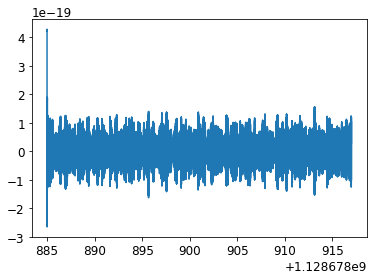

In [ ]:
strain_fil = highpass(strain, 25.0)
plt.plot(strain_fil.sample_times, strain_fil)

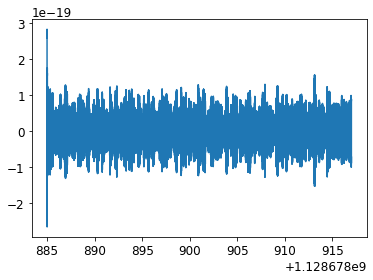

In [ ]:
strain_res = resample_to_delta_t(strain_fil, 1.0/2048)
pylab.plot(strain_res.sample_times, strain_res)

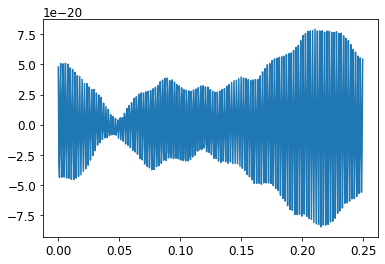

In [ ]:
strain_025s = strain_res.time_slice(merger.time-0.1875, merger.time+0.0625)
strain_025s.start_time = 0
pylab.plot(strain_025s.sample_times, strain_025s)

(512,)
(1, 512, 1)


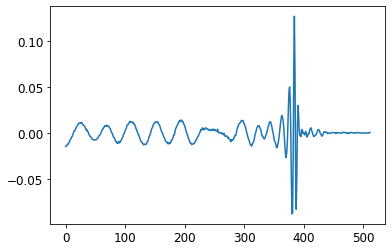

In [ ]:
# samples = np.array(strain_025s)
# print(samples.shape)
# samples = samples.reshape((1, 512, 1))
# print(samples.shape)

# prediction = model.predict(samples)
# prediction =prediction. reshape((512,1))

# import matplotlib.pyplot as plt

# plt.plot(prediction)

In [ ]:
samples = strain_025s

In [ ]:

apx = 'IMRPhenomD'
N=2048*16  #N is number of samples, N=length/delta_t
fs=2048 #fs is sampling frequnecy
length= N// fs #duration of segment
delta_f= fs/ N
f_samples = N//2 +1 
f_lower=50
delta_t=1.0/2048
from pycbc.psd.analytical import AdVDesignSensitivityP1200087

def get_psd(f_samples, delta_f, low_freq_cutoff):
    psd=AdVDesignSensitivityP1200087(f_samples, delta_f, low_freq_cutoff)
    return psd

psd=get_psd(f_samples, delta_f, f_lower)

from pycbc.noise.gaussian import frequency_noise_from_psd
def get_noise(psd, seed=None):
    noise=frequency_noise_from_psd(psd, seed=seed)
    noise_time = noise.to_timeseries()
    return noise_time

from pycbc.psd import welch, interpolate
def get_whiten(signal_plus_noise):
    signal_freq_series=signal_plus_noise.to_frequencyseries()
    numerator = signal_freq_series
    psd_to_whiten = interpolate(welch(signal_plus_noise), 1.0 / signal_plus_noise.duration)
    denominator=np.sqrt(psd_to_whiten)
    whiten_freq = (numerator / denominator)
    whiten=whiten_freq.to_timeseries().highpass_fir(30., 512).lowpass_fir(300.0, 512)
    return whiten

def add_noise_signal(noise, signal):
    noise.start_time = 0
    signal.start_time = 0
    length_signal = len(signal)
    signal_plus_noise=noise
    signal_plus_noise[0:length_signal]=np.add(noise[0:length_signal], signal)
    return signal_plus_noise

noise=get_noise(psd)
whiten = get_whiten(noise)
whiten = whiten/np.std(whiten)
whiten_noise = whiten.time_slice(3,3+0.25)

samples.start_time = 0
whiten_noise.start_time = 0
samples = samples* (10**22)
data_final = add_noise_signal(whiten_noise, samples) 

In [ ]:
data_final.shape
X = np.array(data_final)
X = X.reshape((1,512,1))

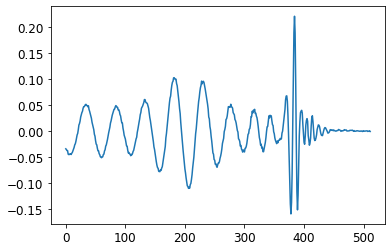

In [ ]:


prediction = model.predict(X)
prediction =prediction. reshape((512,1))

import matplotlib.pyplot as plt

plt.plot(prediction)